# Section 3: Running Random Simulations in Numpy

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Simulating random coin flips
np.random.seed(0)
die_roll = np.random.randint(1, 7) 
assert 1 <= die_roll <= 6

In [3]:
np.random.seed(0)
die_rolls = [np.random.randint(1, 7) for _ in range(3)]
assert die_rolls == [5, 6, 1]

In [4]:
np.random.seed(0)
coin_flip = np.random.randint(0,2) 
print(f'Coin landed on {'heads' if coin_flip == 1 else 'tails'}')

Coin landed on tails


In [5]:
# simulating 10 coin flips
np.random.seed(0)
tosses = [np.random.randint(0,2) for _ in range(10)]
for toss in tosses:
    print(f'Coin landed on {'heads' if toss == 1 else 'tails'}')

Coin landed on tails
Coin landed on heads
Coin landed on heads
Coin landed on tails
Coin landed on heads
Coin landed on heads
Coin landed on heads
Coin landed on heads
Coin landed on heads
Coin landed on heads


In [6]:
np.random.seed(0)
tosses = [np.random.randint(0,2) for _ in range(10)]
p_head = np.sum(tosses)/len(tosses)
p_tails = 1 - p_head
print(p_head)
print(p_tails)

0.8
0.19999999999999996


In [7]:
def frequency_heads(coin_flip_sequence):
    total_heads = sum(coin_flip_sequence)
    return total_heads/len(coin_flip_sequence)



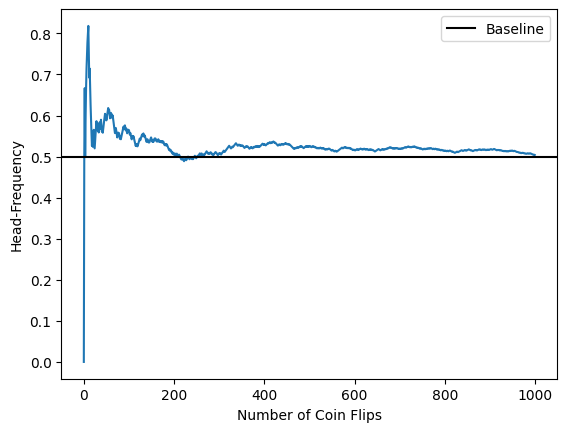

In [8]:
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0, 2))
    frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color='k', label = 'Baseline')
plt.xlabel('Number of Coin Flips')
plt.ylabel('Head-Frequency')
plt.legend()
plt.show()

In [9]:
# flipping a biased coin flip
# change the probability of the sampling (i.e from a binomial distribution)

np.random.seed(0)
print(f'Let us flip the biased coin once')
coin_flip = np.random.binomial(1, 0.7)
print(f'Biased coin landed on {'Heads' if coin_flip == 1 else 'tails'}.')

print('\n Let us flip the biased coin 10 times')
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, .7)
print((f"{head_count} heads were observed out of "
    f"{number_coin_flips} biased coin flips"))

Let us flip the biased coin once
Biased coin landed on Heads.

 Let us flip the biased coin 10 times
6 heads were observed out of 10 biased coin flips


In [10]:
# sequence of 1000 biased coin flips
np.random.seed(0)
head_count = np.random.binomial(1000, 0.7)
frequency = head_count / 1000
print(f"Frequency of Heads is {frequency}")


Frequency of Heads is 0.697


In [11]:
np.random.seed(0)
assert np.random.binomial(1000, 0.7) / 1000 == 0.697
for i in range(1, 6):
    head_count = np.random.binomial(1000, 0.7)
    frequency = head_count / 1000
    print(f"Frequency at iteration {i} is {frequency}")
    if frequency == 0.7:
        print("Frequency equals the probability!\n")

Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Frequency equals the probability!

Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


## Confidence interval

Suppose we flip the coin 1000 times and observe a frequency of 0.709. We know the frequency approximates the actual probability but by how much? 
More precisely, what are the chances of an actual probability falling within an interval close to 0.709 (such as interval between 0.7 and 0.71)? To find out, we must do additional sampling.


In [12]:
np.random.seed(0)
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)] #500 simulations of 1000 coin tosses
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500) #more efficient with numpy optimazations
assert head_count_array.tolist() == head_count_list

In [13]:
frequency_array = head_count_array/1000


In [14]:
print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


In [15]:
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")
print(f"Difference across frequency range: {max_freq - min_freq}")

Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference across frequency range: 0.07699999999999996


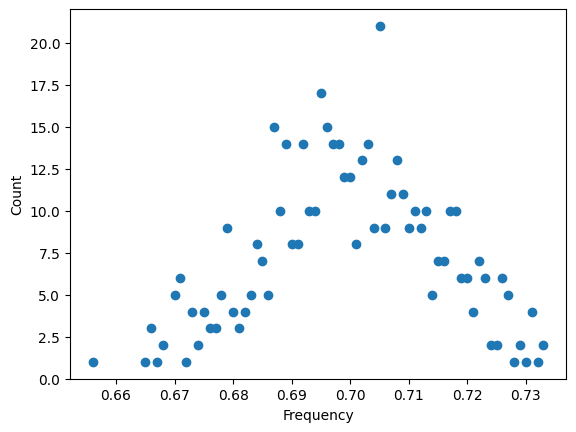

In [16]:
from collections import defaultdict
frequency_counts = defaultdict(int)
for frequency in frequency_array:
    frequency_counts[frequency] += 1
frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]
plt.scatter(frequencies, counts)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()



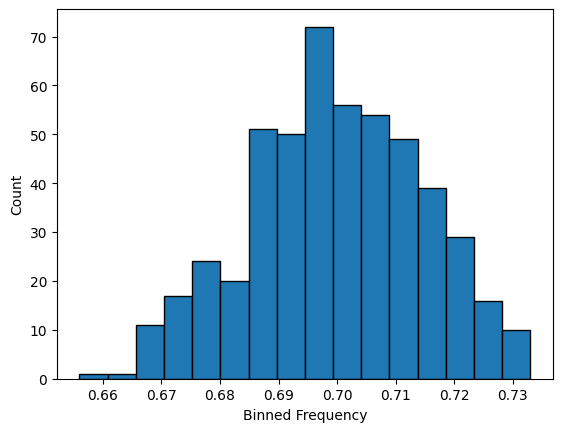

In [18]:
# histogram it 
plt.hist(frequency_array, bins = 'auto', edgecolor ='black')
plt.xlabel('Binned Frequency')
plt.ylabel('Count')
plt.show()

Number of Bins: 16


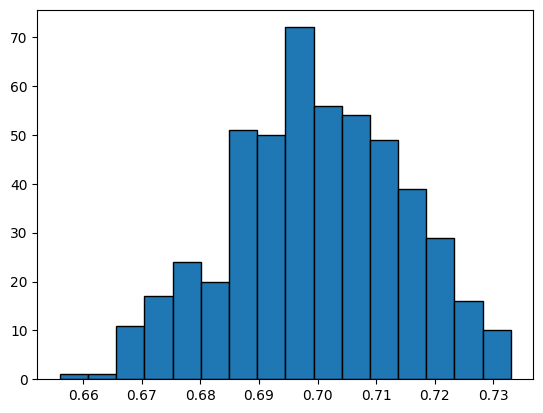

In [20]:
# counting bins

counts, _, _ = plt.hist(frequency_array, bins = 'auto', edgecolor='black')
print(f'Number of Bins: {counts.size}')


Bin width: 0.004812499999999997


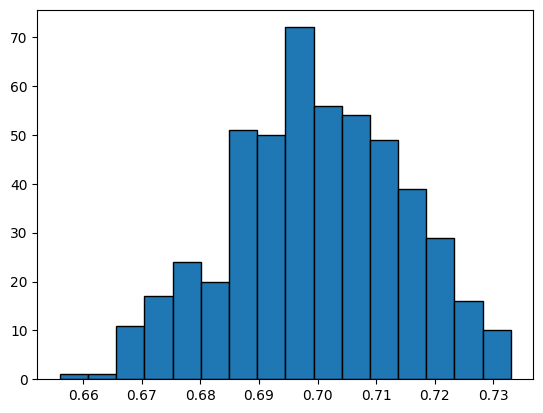

In [21]:
counts, bin_edges, _ = plt.hist(frequency_array, bins='auto',
edgecolor='black')
bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"Bin width: {bin_width}")

In [22]:
def output_bin_coverage(i):
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    range_string = f"{range_start} - {range_end}"
    print((f"The bin for frequency range {range_string} contains "
        f"{count} element{'' if count == 1 else 's'}"))
output_bin_coverage(0)
output_bin_coverage(5)

The bin for frequency range 0.656 - 0.6608125 contains 1 element
The bin for frequency range 0.6800625 - 0.684875 contains 20 elements


In [23]:
assert counts[counts.argmax()] == counts.max()

In [25]:
output_bin_coverage(counts.argmax())

The bin for frequency range 0.6945 - 0.6993125 contains 72 elements


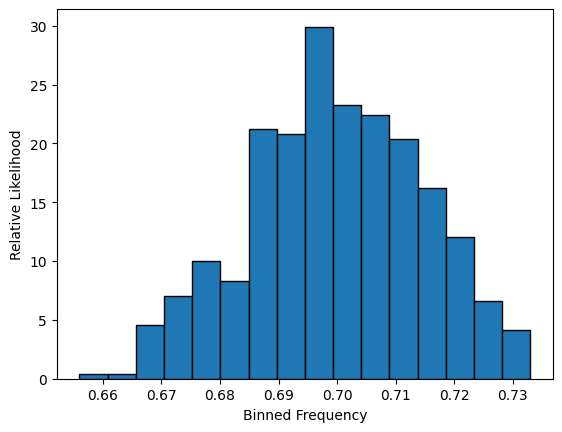

In [26]:
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto',
edgecolor='black', density=True)
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

In [27]:
assert likelihoods.sum() * bin_width == 1.0

In [30]:
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.144


In [31]:
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index - 1, peak_index + 2)
area = likelihoods[start_index: end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464


In [32]:
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1
        area = likelihoods[start_index: end_index + 1].sum() * bin_width
    
    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start:.6f} - {range_end:.6f}"
    print((f"The frequency range {range_string} represents a "
        f"{100 * area:.2f}% confidence interval"))
    return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.670438 - 0.723375 represents a 95.40% confidence interval


(np.int64(3), np.int64(14))

In [33]:
# shrinking the range of high confidence interval
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array / 1000
assert frequency_array.size == 100000

The frequency range 0.670429 - 0.727857 represents a 95.42% confidence interval


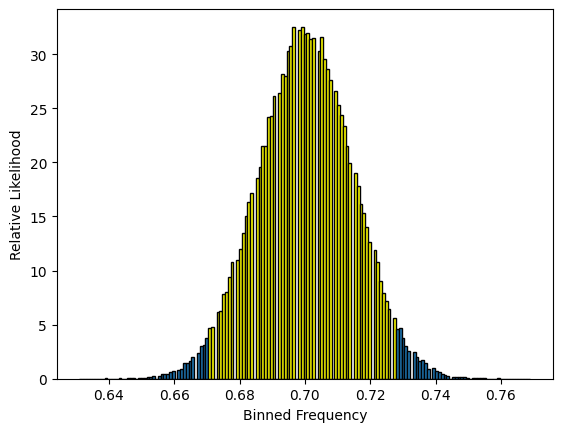

In [34]:
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins ='auto', edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


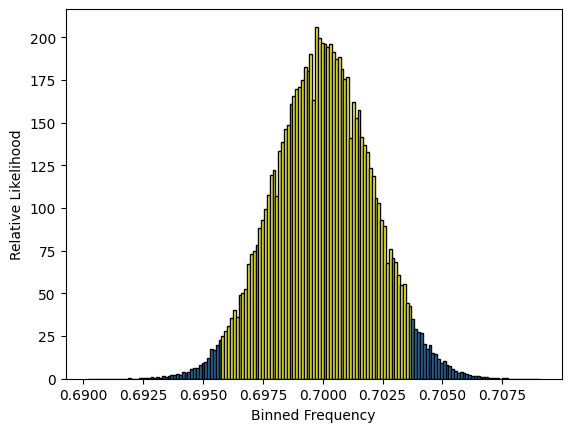

In [36]:
# increasing the number of tosses for a single run of experiment
np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array / 50000
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods,
bin_width)
for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

In [37]:
np.random.seed(0)
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto',
density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


(np.int64(47), np.int64(114))

In [38]:
# using confidence intervals to analyse a biased deck of cards
np.random.seed(0)
total_cards = 52
red_card_count = np.random.randint(0, total_cards + 1)

In [39]:
black_card_count = total_cards - red_card_count

In [40]:
def get_matching_events(event_condition, sample_space):
    return set([outcome for outcome in sample_space if event_condition(outcome)])

def compute_event_probability(event_condition, weighted_sample_space):
    events = get_matching_events(event_condition, weighted_sample_space)
    event_size = sum(weighted_sample_space[outcome] for outcome in events)
    tot_size = sum(weighted_sample_space.values())
    return event_size/tot_size


In [42]:
weighted_sample_space = {'red_card': red_card_count,
    'black_card': black_card_count}

prob_red = compute_event_probability(lambda x: x == 'red_card', weighted_sample_space)
prob_red

0.8461538461538461

In [43]:
red_card_count

44

In [44]:
assert prob_red == red_card_count/total_cards

In [45]:
# simulating a random card

np.random.seed(0)
color = 'red' if np.random.binomial(1, prob_red) else 'black'
print(f"The first card in the shuffled deck is {color}")

The first card in the shuffled deck is red


In [46]:
np.random.seed(0)
red_count = np.random.binomial(10, prob_red)
print(f" In {red_count} out of 10 shuffles, a red came up first.")

 In 8 out of 10 shuffles, a red came up first.


In [49]:
np.random.seed(0)
red_count_array = np.random.binomial(50000, prob_red, 100000)
frequency_array = red_count_array / 50000

likelihoods, bin_edges = np.histogram(frequency_array, bins ='auto', density=True)

bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)


The frequency range 0.842865 - 0.849139 represents a 95.16% confidence interval


In [51]:
range_start = round(0.842771 * total_cards)
range_end = round(0.849139 * total_cards)
print(f"The number of red cards in the deck is between {range_start} and {range_end}")

The number of red cards in the deck is between 44 and 44


In [52]:
if red_card_count == 44:
    print('We are correct! There are 44 red cards in the deck')
else:
    print('Oops! Our sampling estimation was wrong.')

We are correct! There are 44 red cards in the deck


In [53]:
# Using permutations to shuffle cards

np.random.seed(0)
card_deck = [1, 1, 0, 0]
np.random.shuffle(card_deck)
card_deck

[0, 0, 1, 1]

In [54]:
np.random.seed(0)
unshuffled_deck = [1, 1, 0, 0]
shuffled_deck = np.random.permutation(unshuffled_deck)
assert unshuffled_deck == [1, 1, 0, 0]
print(shuffled_deck)

[0 0 1 1]


In [55]:
import itertools
for permutation in list(itertools.permutations(unshuffled_deck))[:3]:
    print(permutation)

(1, 1, 0, 0)
(1, 1, 0, 0)
(1, 0, 1, 0)


In [56]:
for permutation in list(itertools.permutations([0, 1, 2, 3]))[:3]:
    print(permutation)

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)


In [57]:
weighted_sample_space = defaultdict(int)
for permutation in itertools.permutations(unshuffled_deck):
    weighted_sample_space[permutation] += 1
for permutation, count in weighted_sample_space.items():
    print(f"Permutation {permutation} occurs {count} times")

Permutation (1, 1, 0, 0) occurs 4 times
Permutation (1, 0, 1, 0) occurs 4 times
Permutation (1, 0, 0, 1) occurs 4 times
Permutation (0, 1, 1, 0) occurs 4 times
Permutation (0, 1, 0, 1) occurs 4 times
Permutation (0, 0, 1, 1) occurs 4 times


In [58]:
sample_space = set(itertools.permutations(unshuffled_deck))
event_condition = lambda x: list(x) == unshuffled_deck
prob = compute_event_probability(event_condition, sample_space)
assert prob == 1 / len(sample_space)
print(f"Probability that a shuffle does not alter the deck is {prob}")

TypeError: 'set' object is not subscriptable

In [ ]:
red_cards = 5 * [1]
black_cards = 5 * [0]
unshuffled_deck = red_cards + black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
print(f"Sample space for a 10-card deck contains {len(sample_space)}
elements")